# Web scraping Facebook Reviews

Fortunately, there are a lot of services that already automate this process. Unfortunately, most of them are paid.

This is a free one (for 14 days) which seems pretty easy to use =&gt; https://wextractor.com/facebook

### Let's Start!

nvm lots of errors

### Attempt 2

Using cool library called facebook_scraper to scrape Sakara Life's page

Following this article: https://medium.com/analytics-vidhya/facebook-post-scraping-and-text-analytics-9eea10563a3a

Article is kinda lacking in information so I had to figure stuff out, but I detailed everything I did below

In [ ]:
!pip install facebook_scraper

     |████████████████████████████████| 43 kB 3.9 MB/s 
     |████████████████████████████████| 132 kB 41.8 MB/s 
     |████████████████████████████████| 288 kB 48.7 MB/s 
     |████████████████████████████████| 749 kB 66.7 MB/s 
     |████████████████████████████████| 83 kB 4.2 MB/s 
     |████████████████████████████████| 70 kB 20.9 MB/s 
     |████████████████████████████████| 111 kB 76.3 MB/s 
     |████████████████████████████████| 339 kB 71.9 MB/s 
  Created wheel for demjson3: filename=demjson3-3.0.5-py3-none-any.whl size=76064 sha256=b3b391f380a2bd19a5cb780b45a46419032beb918662e7087ac491b3b5480773
  Stored in directory: /root/.cache/pip/wheels/c1/8b/a2/29e1cb2a9a3a27a5cfe8a57856a3310ea1e3c0a394eee8db61
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1272 sha256=9a0704317f432e46e3cbb44649e9c2d8fe554e83073c51315c48546912253f7d
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
  Created wheel for fake-usera

In [ ]:
from facebook_scraper import get_posts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/shared-libs/python3.7/py/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Testing to make sure it works. What I had to do:

1) Make a fake facebook account so that I don't get banned

2) Download this extension (https://chrome.google.com/webstore/detail/get-cookiestxt/bgaddhkoddajcdgocldbbfleckgcbcid/related?hl=en)

3) Login to facebook account and use extension, and download the session id file generated

4) Upload the session file here and then in the "cookies" parameter in the next block, replace it with that file's name

In [ ]:
for post in get_posts('nintendo', pages=1, cookies='facebook.com_cookies.txt'):
    print(post['text'][:50])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: UserWarning: A low page limit (<=2) might return no results, try increasing the limit
  exec(code_obj, self.user_global_ns, self.user_ns)
Experience new adventures with LEGO Peach! Here’s 
A new Kirby-themed physical award is on the way!
T
/root/venv/lib/python3.7/site-packages/facebook_scraper/facebook_scraper.py:841: UserWarning: Facebook says 'Unsupported Browser'
  warnings.warn(f"Facebook says 'Unsupported Browser'")


Ok let's try an actual full meal service brand =&gt; The string you want to pass into the get_posts function should be everything after the slash "facebook.com/PAGE_NAME"

There's a lot of options you can pass (have to look at documentation, but the one's below should be enough, feel free to remove/add stuff   

In [ ]:
post_df_full = pd.DataFrame();

for post in get_posts('SakaraLife', cookies='facebook.com_cookies.txt', extra_info=True, pages=5, options={"comments": True}):
    post_entry = post
    fb_post_df = pd.DataFrame.from_dict(post_entry, orient='index')
    fb_post_df = fb_post_df.transpose()
    post_df_full = post_df_full.append(fb_post_df)
    print(post['post_id'] + ' get')
    

5189365661152567 get
5186889341400199 get
5170780479677752 get
5150410701714730 get
5144644155624718 get
5137345683021232 get
5120657154690085 get
5109823842440083 get
5104445532977914 get
5099690703453397 get
5093764057379395 get
5079263065496161 get
5077016862387448 get
5066579443431190 get
5063424447080023 get
5056960504393084 get
5051504588272009 get


In [ ]:
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 0
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        17 non-null     object        
 1   text                           17 non-null     object        
 2   post_text                      17 non-null     object        
 3   shared_text                    17 non-null     object        
 4   original_text                  0 non-null      object        
 5   time                           17 non-null     datetime64[ns]
 6   timestamp                      17 non-null     object        
 7   image                          16 non-null     object        
 8   image_lowquality               17 non-null     object        
 9   images                         17 non-null     object        
 10  images_description             17 non-null     object        
 11  images_lowquality     

In [ ]:
post_df_full.head()

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
0,5189365661152567,"A moment of appreciation for high-vibe, vibran...","A moment of appreciation for high-vibe, vibran...",,None,2022-04-06 14:00:26,1649253626,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,[https://scontent-iad3-1.xx.fbcdn.net/v/t39.30...,...,https://www.facebook.com/SakaraLife/posts/5189...,"{'like': 13, 'love': 1}",14,None,108057625950088,None,None,[],False,2022-04-08 01:06:23.002239
0,5186889341400199,You've been loving our new Detox Protein Super...,You've been loving our new Detox Protein Super...,,None,2022-04-05 15:47:43,1649173663,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,[https://scontent-iad3-1.xx.fbcdn.net/v/t39.30...,...,https://www.facebook.com/SakaraLife/posts/5186...,"{'like': 8, 'love': 1}",9,None,108057625950088,None,5186889291400204,[5186889291400204],False,2022-04-08 01:06:25.465812
0,5170780479677752,Functional foods backed by science and guided ...,Functional foods backed by science and guided ...,,None,2022-03-30 14:48:41,1648651721,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,[https://scontent-iad3-1.xx.fbcdn.net/v/t39.30...,...,https://www.facebook.com/SakaraLife/posts/5170...,"{'like': 5, 'love': 2}",7,None,108057625950088,None,5170780426344424,[5170780426344424],False,2022-04-08 01:06:27.397679
0,5150410701714730,"All the perks of an afternoon latte, none of c...","All the perks of an afternoon latte, none of c...",,None,2022-03-22 21:30:12,1647984612,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,[https://scontent-iad3-1.xx.fbcdn.net/v/t39.30...,...,https://www.facebook.com/SakaraLife/posts/5150...,{'like': 4},4,None,108057625950088,None,None,[],False,2022-04-08 01:06:31.031183
0,5144644155624718,"Hello, Spring. 🌸 The vernal equinox is here—on...","Hello, Spring. 🌸 The vernal equinox is here—on...",,None,2022-03-20 14:43:28,1647787408,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,https://scontent-iad3-1.xx.fbcdn.net/v/t39.308...,[https://scontent-iad3-1.xx.fbcdn.net/v/t39.30...,...,https://www.facebook.com/SakaraLife/posts/5144...,"{'like': 13, 'love': 4, 'care': 1}",18,None,108057625950088,None,5144644102291390,[5144644102291390],False,2022-04-08 01:06:33.209188


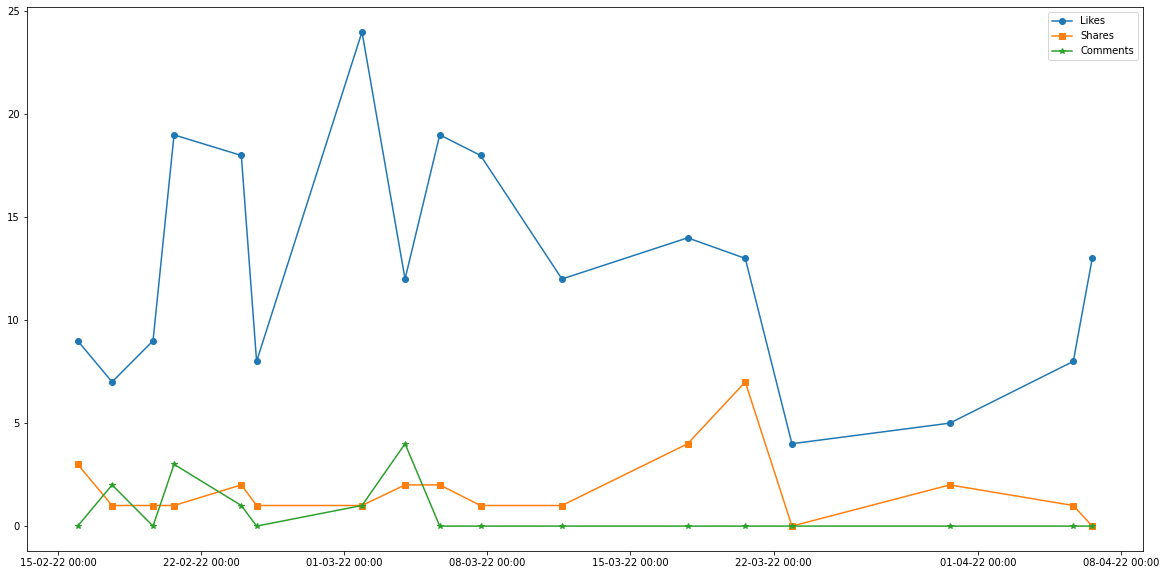

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full['time'], post_df_full['likes'], label = "Likes", marker="o")
ax.plot(post_df_full['time'], post_df_full['shares'], label = "Shares", marker="s")
ax.plot(post_df_full['time'], post_df_full['comments'], label = "Comments", marker="*")
plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [ ]:
post_df_full[['post_id', 'reactions']]

,post_id,reactions
0,5189365661152567,"{'like': 13, 'love': 1}"
0,5186889341400199,"{'like': 8, 'love': 1}"
0,5170780479677752,"{'like': 5, 'love': 2}"
0,5150410701714730,{'like': 4}
0,5144644155624718,"{'like': 13, 'love': 4, 'care': 1}"
0,5137345683021232,"{'like': 14, 'love': 5}"
0,5120657154690085,"{'like': 12, 'love': 3}"
0,5109823842440083,"{'like': 18, 'love': 4}"
0,5104445532977914,"{'like': 19, 'love': 1}"
0,5099690703453397,"{'like': 12, 'love': 1}"


Can do more data analysis such as comparing comment sentiment with different reactions

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9e88faaf-ade4-4526-a9d5-3a022b266140' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>